In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
esg_data = pd.read_csv('../../data/SP500_ESG_Score_average_per_year.csv')

In [14]:
# make columns lowercase
esg_data.columns = esg_data.columns.str.lower()
# make - and spaces into _
esg_data.columns = esg_data.columns.str.replace(' ', '_')
esg_data.columns = esg_data.columns.str.replace('-', '_')
esg_data.head(10)

,year,company_symbol,total_score,e_score,s_score,g_score
0,2014,A,72.50,83.00,73.00,63.00
1,2014,AAL,72.75,77.00,67.00,75.25
2,2014,AAPL,60.75,74.00,45.00,62.00
3,2014,ABBV,64.50,70.25,60.25,67.50
4,2014,ABT,64.00,71.00,57.00,69.00
5,2014,ACGL,46.00,34.00,54.00,47.50
6,2014,ACN,72.00,77.00,66.00,78.00
7,2014,ADBE,70.00,75.00,71.00,63.00
8,2014,ADI,65.50,64.75,66.00,66.00
9,2014,ADM,52.25,56.50,41.75,62.50


NameError: name 'np' is not defined

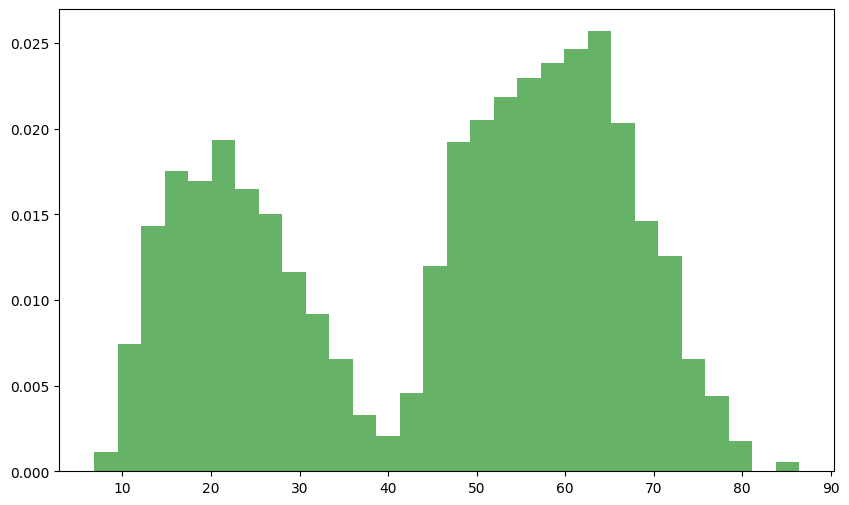

In [19]:
# Drop NaN values before plotting
esg_data['total_score'].dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(esg_data['total_score'], bins=30, density=True, alpha=0.6, color='g')

# Add a best fit line for KDE
from scipy.stats import norm
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, esg_data['total_score'].mean(), esg_data['total_score'].std())
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribution of Total ESG Scores')
plt.xlabel('Total ESG Score')
plt.ylabel('Frequency')
plt.show()



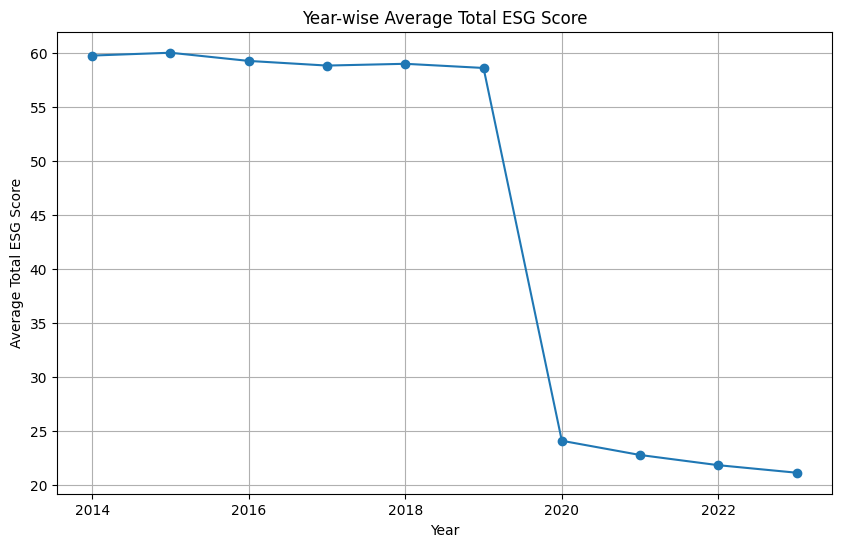

In [20]:
plt.figure(figsize=(10, 6))
yearwise_avg_score = esg_data.groupby('year')['total_score'].mean().reset_index()
plt.plot(yearwise_avg_score['year'], yearwise_avg_score['total_score'], marker='o')

plt.title('Year-wise Average Total ESG Score')
plt.xlabel('Year')
plt.ylabel('Average Total ESG Score')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

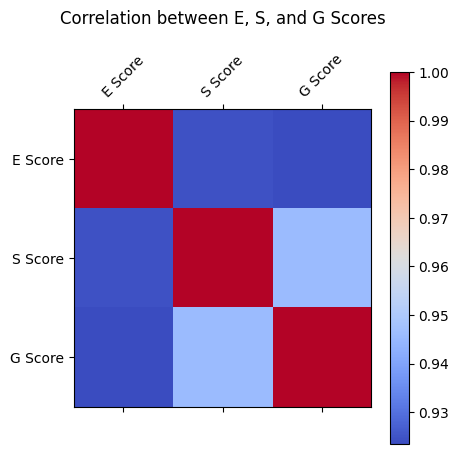

In [22]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix
correlation_matrix = esg_data[['e_score', 's_score', 'g_score']].corr()

# Plot heatmap
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)

plt.title('Correlation between E, S, and G Scores', pad=20)
plt.xticks(np.arange(3), ['E Score', 'S Score', 'G Score'], rotation=45)
plt.yticks(np.arange(3), ['E Score', 'S Score', 'G Score'])

plt.show()
